In [1]:
%matplotlib inline
import numpy as np
import time
from linear_solvers import NumPyLinearSolver, HHL
from qiskit.quantum_info import Statevector
from qiskit import *
from qiskit.tools.visualization import plot_histogram


def get_solution_vector(solution):
    """Extracts and normalizes simulated state vector
    from LinearSolverResult."""
    solution_vector = Statevector(solution.state).data[16:18].real
    norm = solution.euclidean_norm
    return norm * solution_vector / np.linalg.norm(solution_vector)


Naive Solution
 -0.33062052726745605 seconds
 {   'circuit_results': None,
    'euclidean_norm': 1.1858541225631376,
    'observable': None,
    'state': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7fe45df91f50>}
naive raw solution vector: [0.75+3.47755428e-16j 0.25+1.16143956e-16j]
full naive solution vector: [1.125 0.375]


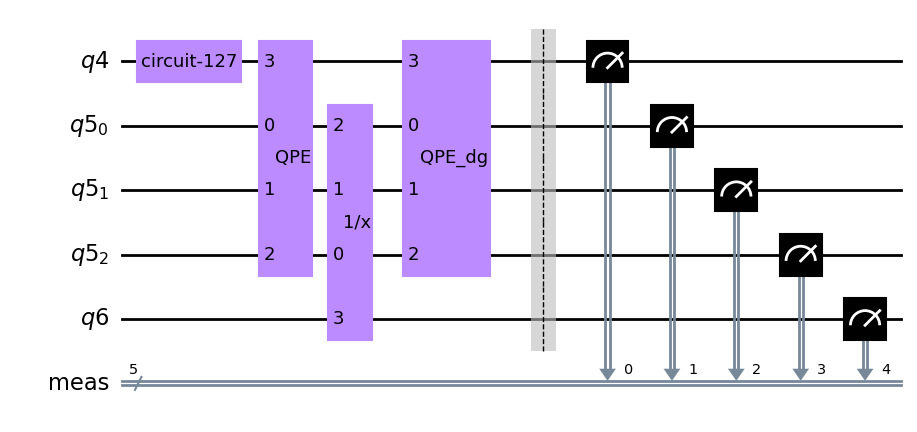

In [2]:
matrix = np.array([ [1, -1/3], [-1/3, 1] ])
vector = np.array([1, 0])

start_time = time.time()
naive_hhl_solution = HHL().solve(matrix, vector)
end_time = time.time()
print('Naive Solution\n', start_time - end_time, 'seconds\n', naive_hhl_solution)

naive_sv = Statevector(naive_hhl_solution.state).data
naive_full_vector = np.array([naive_sv[16], naive_sv[17]])

# Raw vector = components expressed complex numbers
# Full vector = components expressed in the real numbers
print('naive raw solution vector:', naive_full_vector)
print('full naive solution vector:', get_solution_vector(naive_hhl_solution))
naive_hhl_solution.state.measure_all()
naive_hhl_solution.state.draw(output='mpl')


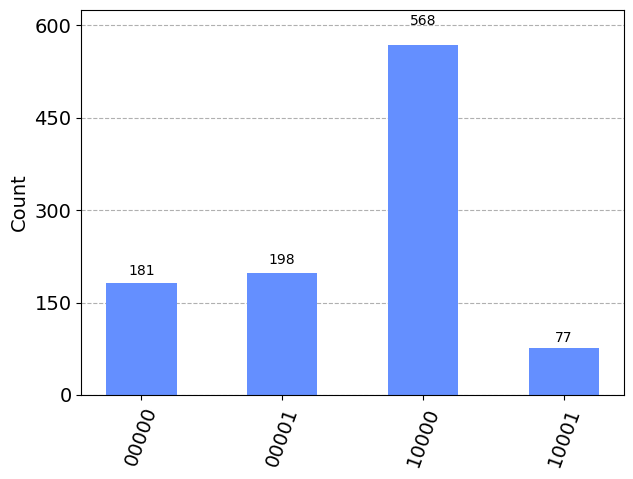

In [3]:
simulator = Aer.get_backend('statevector_simulator')
res = execute(naive_hhl_solution.state, backend=simulator, shots=1024).result()
plot_histogram(res.get_counts())

In [4]:
start_time = time.time()
classical_solution = NumPyLinearSolver().solve(matrix,
                                               vector/np.linalg.norm(vector))
end_time = time.time()
print('Classical Solution', start_time - end_time, 'seconds\n', classical_solution.state)


Classical Solution -0.0004253387451171875 seconds
 [1.125 0.375]


In [36]:
from qiskit import IBMQ, transpile
from qiskit.utils.mitigation import complete_meas_cal

provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')

backends = provider.backends(simulator=False, operational=True)
print(backends)
backend = backends[0]

job = execute(naive_hhl_solution.state, backend, shots=1024)

[<IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_kyoto') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_osaka') from IBMQ(hub='ibm-q', group='open', project='main')>]


In [ ]:
plot_histogram(job.result().get_counts())
